# **1. Library Importing**

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import lazypredict

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import datasets, metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error#, root_mean_squared_error
from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier



from mealpy import FloatVar, StringVar, IntegerVar, BoolVar, MixedSetVar, SA, SMA, Problem

# **2. Dataset**

## 2.1 Load Data Set

In [3]:
# @title Setting the filepath based on the platform used

if 'google.colab' in str(get_ipython()):              # If the notebook were used in Google Colab environment
  medCost_filepath = './content/insurance.csv'
  iris_filepath = './content/iris.csv'
  mallCust_filepath = './content/Mall_Customers.csv'
else:                                                 # If the notebook and datasets are stored locally
  medCost_filepath = './data/insurance.csv'
  iris_filepath = './data/iris.csv'
  mallCust_filepath = './data/Mall_Customers.csv'

med_cost_df = pd.read_csv(medCost_filepath)
iris_df = pd.read_csv(iris_filepath)
mall_cust_df = pd.read_csv(mallCust_filepath)

In [4]:
# @title Creating a copy of each dataset

med_cost_df_orig = med_cost_df.copy()
iris_df_orig = iris_df.copy()
mall_cust_df_orig = mall_cust_df.copy()

In [18]:
# ⚠️ @title Reset DataFrame

n_items = 2

print("Current DataFrames:")
print(med_cost_df.head(n_items), '\n')
print(iris_df.head(n_items), '\n')
print(mall_cust_df.head(n_items), '\n\n')

med_cost_df = med_cost_df_orig.copy()
iris_df = iris_df_orig.copy()
mall_cust_df = mall_cust_df_orig.copy()

print("\nAfter reset:")
print(med_cost_df.head(n_items), '\n')
print(iris_df.head(n_items), '\n')
print(mall_cust_df.head(n_items), '\n')

Current DataFrames:
   age  sex    bmi  children  smoker  region     charges
0   19    0  27.90         0       1       3  16884.9240
1   18    1  33.77         1       0       2   1725.5523 

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0 

   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       1   19                  15                      39
1       1   21                  15                      81 



After reset:
   age     sex    bmi  children smoker     region     charges
0   19  female  27.90         0    yes  southwest  16884.9240
1   18    male  33.77         1     no  southeast   1725.5523 

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.

# **3. Exploratory Data Analysis**

In [ ]:
# @title Creating a procedure to display simple data overview

def df_details(df):
  """
  Displaying the Dataset Information, Dataset description, and Plotting a pairplot of the features
  
  Parameters
  ------
  df  : Pandas DataFrame
        DataFrame from which the Info, Desc, and Pairplot is retrieved 
  """
  print("Dataset info:")
  print(df.info(), '\n')

  print("Dataset description (numeric columns only):")
  print(df.describe(), '\n')

  print("Pairplot of the features (numeric columns only):")
  sns.pairplot(df)

## 3.1 Medical Cost df

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None 

Dataset description (numeric columns only):
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75

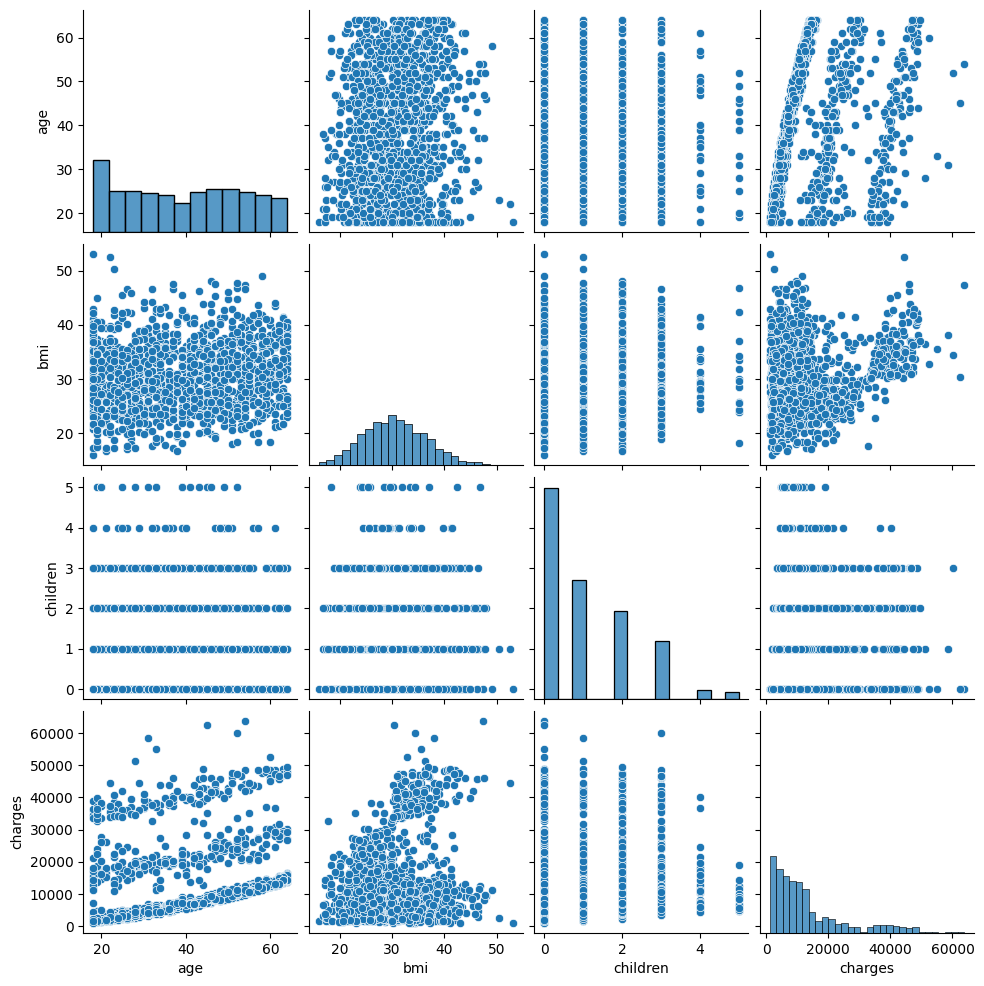

In [7]:
df_details(med_cost_df)

In [8]:
print("Medical cost head :")
print(med_cost_df.head())

Medical cost head :
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


## 3.2 iris dataset

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None 

Dataset description (numeric columns only):
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000     

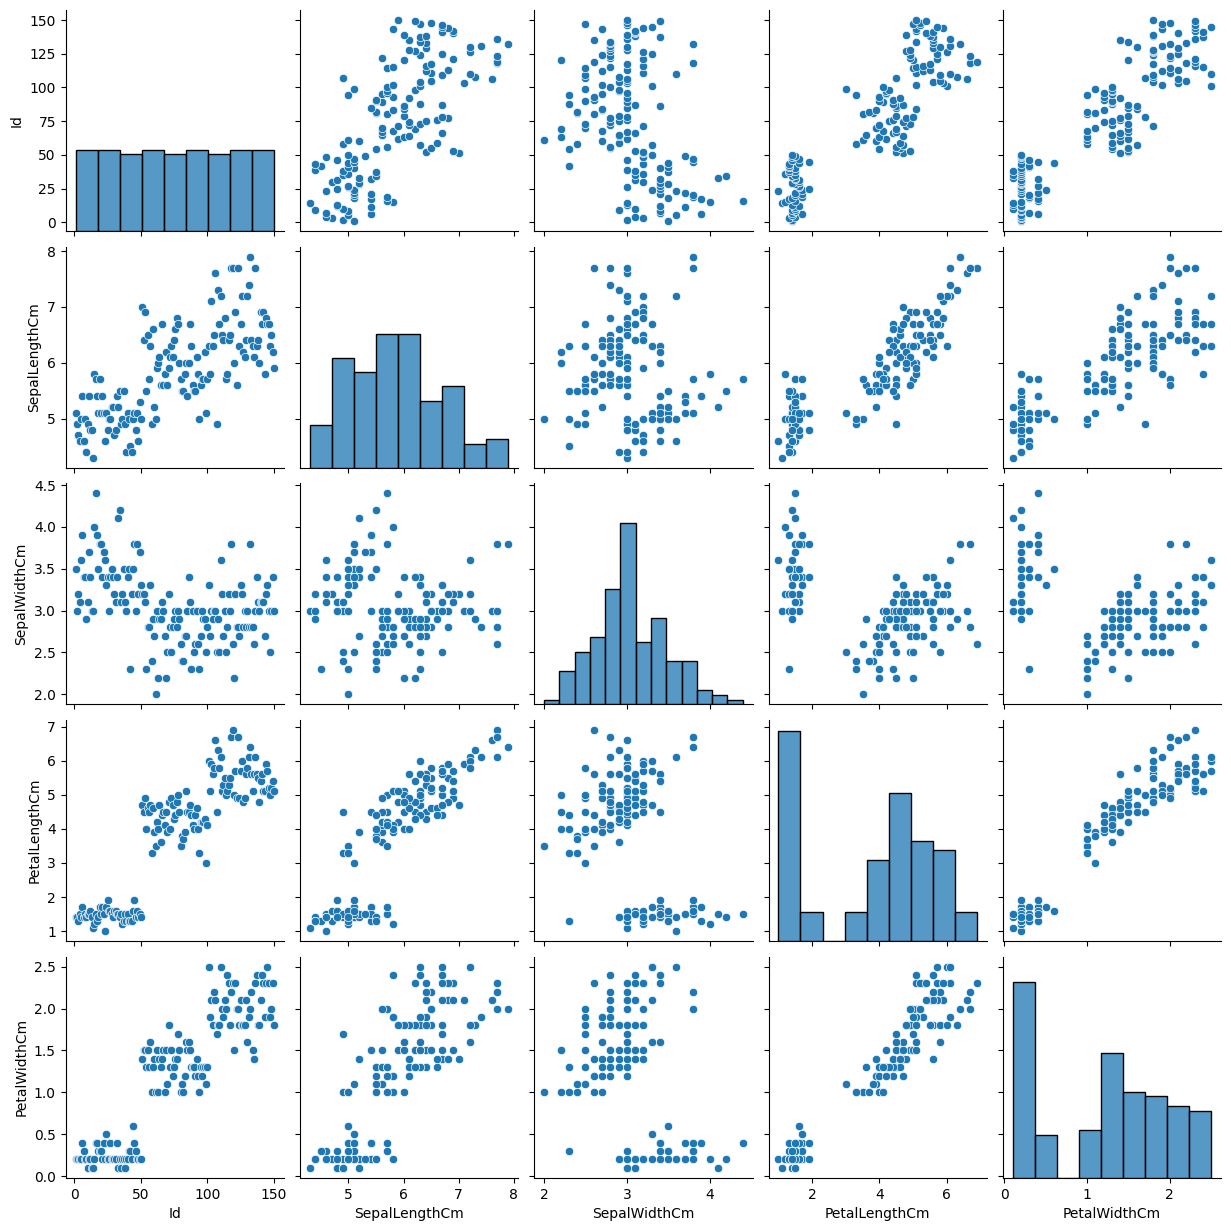

In [9]:
df_details(iris_df)

In [10]:
print("Iris head :")
print(iris_df.head())

Iris head :
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


## 3.3 Mall Customer dataset

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None 

Dataset description (numeric columns only):
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.5000

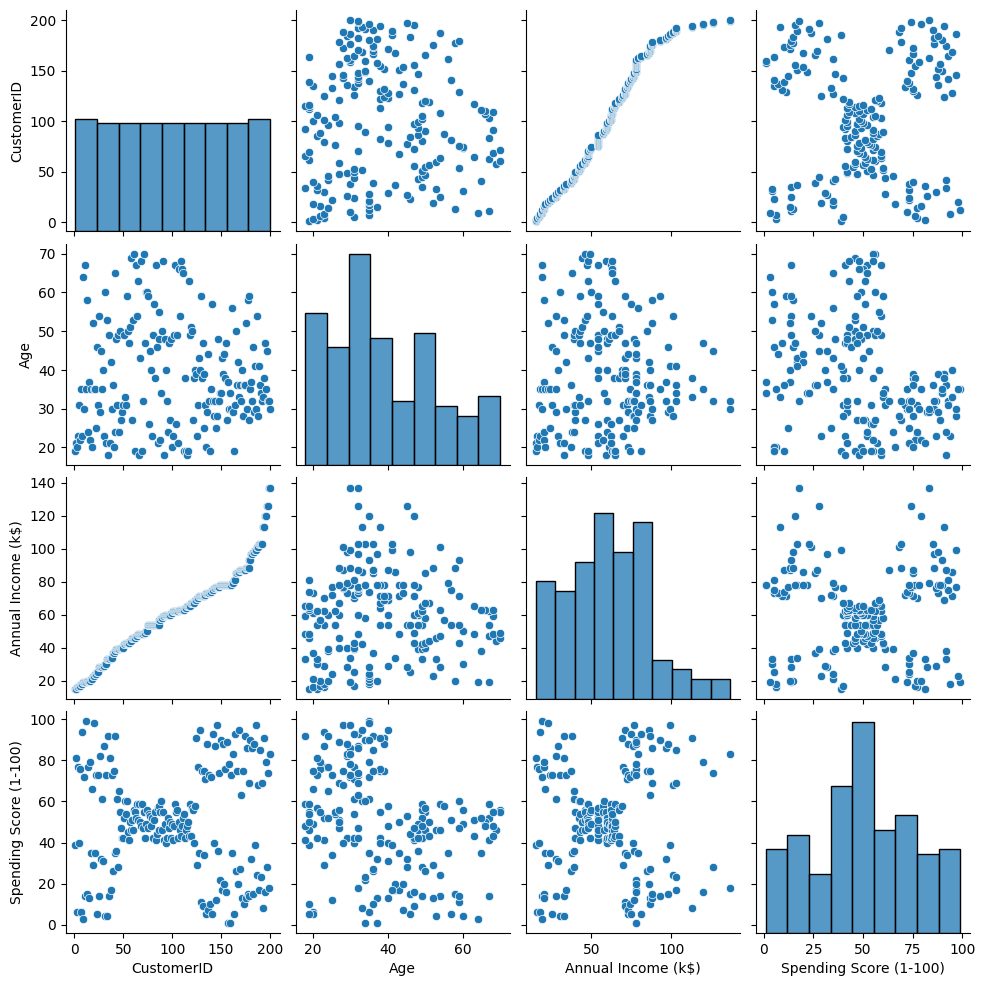

In [11]:
df_details(mall_cust_df)

In [12]:
print("Mall Customers head :")
print(mall_cust_df.head())

Mall Customers head :
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


# **Preporcessing**

In [13]:
# Dictionary for all the dataframes and their respective task types
all_df_dict = {
    'dataframe': [med_cost_df, iris_df, mall_cust_df],
    'task_type': ['regression', 'classification', 'clustering']
}

## Dataset Cleaning

In [14]:
for i, df in enumerate(all_df_dict['dataframe']):
  df.dropna()           # Dropping all records containing NA/Empty values
  # df.drop_duplicates()  # Dropping all records containing duplicates

  # Deleting all the "ID" columns
  num_cols = list(range(df.shape[1]))
  for column in num_cols:

    num_unique_vals = len(df[df.columns[column]].unique())
    num_rows = df.shape[0]

    if num_unique_vals == num_rows:
      print(f"The deleted column is {df.columns[column]}\n")
      df = df.drop(df.columns[column], axis='columns')

      all_df_dict['dataframe'][i] = df

      num_cols.pop()
    else:
      print(f"The current column is {df.columns[column]}")

# Update the original variables
med_cost_df, iris_df, mall_cust_df = all_df_dict['dataframe']

The current column is age
The current column is sex
The current column is bmi
The current column is children
The current column is smoker
The current column is region
The current column is charges
The deleted column is Id

The current column is SepalWidthCm
The current column is PetalLengthCm
The current column is PetalWidthCm
The current column is Species
The deleted column is CustomerID

The current column is Age
The current column is Annual Income (k$)
The current column is Spending Score (1-100)


## Encoding non-categorical features

In [19]:
# @title Encoding all the columns of "object" datatype

for i, df in enumerate(all_df_dict['dataframe']):
    for column in df.columns:
        if df[column].dtype == 'object':
            le = LabelEncoder()
            df[column] = le.fit_transform(df[column])

    all_df_dict['dataframe'][i] = df

# Update the original variables
med_cost_df, iris_df, mall_cust_df = all_df_dict['dataframe']

## Scaling the data (Standarization/Normalization)

In [ ]:
test_size = 0.2
random_state = 42

# train_test_set_dict = {
#     'train_set' : [None,None,None],
#     'test_set' : [None,None,None]
#   }
# all_df_dict.update(train_test_set_dict)

# if len(all_df_dict['train_set']) == 0 and len(all_df_dict['test_set']) == 0:
train_test_set_dict = {
  'train_set' : [None,None,None],
  'test_set' : [None,None,None]
}
all_df_dict.update(train_test_set_dict)

# Iterate through both 'dataframe' and 'task_type'
for i, (df, task) in enumerate(zip(all_df_dict['dataframe'], all_df_dict['task_type'])):
  # print(task)

  std_scaler = StandardScaler()
  # minmax_scaler = MinMaxScaler()

  if task == 'clustering':

    df_train, df_test = train_test_split(df, test_size=test_size, random_state=random_state)

    df_train_scaled = std_scaler.fit_transform(df_train)
    df_test_scaled = std_scaler.transform(df_test)

  else:
    "Ngikutin input user"
    # X = data.drop(columns=[target_column])
    # y = data[target_column]

    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    X_train_scaled = std_scaler.fit_transform(X_train)
    X_test_scaled = std_scaler.transform(X_test)

    if task == 'regression':
      X_train_reg, X_test_reg, y_train_reg, y_test_reg = X_train_scaled, X_test_scaled, y_train, y_test
      all_df_dict['train_set'][i] = [X_train_reg, y_train_reg]
      all_df_dict['test_set'][i] = [X_test_reg, y_test_reg]
    
    elif task == 'classification':
      X_train_clf, X_test_clf, y_train_clf, y_test_clf = X_train_scaled, X_test_scaled, y_train, y_test
      all_df_dict['train_set'][i] = [X_train_clf, y_train_clf]
      all_df_dict['test_set'][i] = [X_test_clf, y_test_clf]

# **Find the best model for task with LazyPredicts**

## LazyRegressor

In [30]:
lazy_reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
model_reg, predictions_reg = lazy_reg.fit(all_df_dict['train_set'][0][0], all_df_dict['test_set'][0][0], all_df_dict['train_set'][0][1], all_df_dict['test_set'][0][1])
model_reg

 48%|████▊     | 20/42 [00:01<00:01, 12.53it/s]c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
100%|██████████| 42/42 [00:04<00:00,  9.78it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.88,0.88,4351.11,0.19
RandomForestRegressor,0.86,0.87,4571.50,0.39
LGBMRegressor,0.86,0.86,4590.16,0.23
HistGradientBoostingRegressor,0.86,0.86,4599.76,0.44
XGBRegressor,0.85,0.85,4822.99,0.13
ExtraTreesRegressor,0.85,0.85,4825.67,0.24
BaggingRegressor,0.85,0.85,4828.92,0.06
KNeighborsRegressor,0.83,0.83,5068.57,0.02
AdaBoostRegressor,0.82,0.82,5267.06,0.03


## LazyClassifer

In [31]:
lazy_clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
model_clf, predictions_clf = lazy_clf.fit(all_df_dict['train_set'][1][0], all_df_dict['test_set'][1][0], all_df_dict['train_set'][1][1], all_df_dict['test_set'][1][1])
model_clf

  0%|          | 0/31 [00:00<?, ?it/s]c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
100%|██████████| 31/31 [00:01<00:00, 29.90it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,None,1.00,0.14
LabelPropagation,1.00,1.00,None,1.00,0.01
XGBClassifier,1.00,1.00,None,1.00,0.17
SVC,1.00,1.00,None,1.00,0.02
RandomForestClassifier,1.00,1.00,None,1.00,0.14
NuSVC,1.00,1.00,None,1.00,0.01
LogisticRegression,1.00,1.00,None,1.00,0.01
BaggingClassifier,1.00,1.00,None,1.00,0.06
LinearDiscriminantAnalysis,1.00,1.00,None,1.00,0.01


# **Metaheuristic**

## SA

### Regression

In [ ]:
data = {
    "X_train": X_train_reg, #X_train,
    "X_test": X_test_reg, #X_test,
    "y_train": y_train_reg, #y_train,
    "y_test": y_test_reg, #y_test
}

class LinRegOptimizedProblem(Problem):
    def __init__(self, bounds=None, minmax="max", data=None, **kwargs):
        self.data = data
        super().__init__(bounds, minmax, **kwargs)

    def obj_func(self, x):
        x_decoded = self.decode_solution(x)
        # C_paras, kernel_paras = x_decoded["C_paras"], x_decoded["kernel_paras"]
        n_jobs, fit_intercept = x_decoded["n_jobs"], x_decoded["fit_intercept"]

        lr = LinearRegression(#C=C_paras,
                            #   kernel=kernel_paras,
                              n_jobs=n_jobs, 
                            #   gamma=gamma,
                              fit_intercept=fit_intercept,
                            #   random_state=random_state
                              )
        # Fit the model
        lr.fit(self.data["X_train"], self.data["y_train"])
        # Make the predictions
        y_predict = lr.predict(self.data["X_test"])
        # Measure the performance
        return metrics.mean_squared_error(self.data["y_test"], y_predict)

my_bounds = [
    IntegerVar(lb=1, ub=50, name="n_jobs"),
    BoolVar(n_vars=1, name="fit_intercept"),
]

problem = LinRegOptimizedProblem(bounds=my_bounds, minmax="max", data=data)
model = SA.OriginalSA(epoch=200, pop_size=20)
model.solve(problem)

print(f"Best agent: {model.g_best}")
print(f"Best solution: {model.g_best.solution}")
print(f"Best Mean Squared Error: {model.g_best.target.fitness}")
print(f"Best parameters: {model.problem.decode_solution(model.g_best.solution)}")

2024/11/24 07:47:41 PM, INFO, mealpy.physics_based.SA.OriginalSA: Solving single objective optimization problem.
2024/11/24 07:47:41 PM, INFO, mealpy.physics_based.SA.OriginalSA: >>>Problem: P, Epoch: 1, Current best: 205753489.80167836, Global best: 205753489.80167836, Runtime: 0.00309 seconds
2024/11/24 07:47:41 PM, INFO, mealpy.physics_based.SA.OriginalSA: >>>Problem: P, Epoch: 2, Current best: 205753489.80167836, Global best: 205753489.80167836, Runtime: 0.00196 seconds
2024/11/24 07:47:41 PM, INFO, mealpy.physics_based.SA.OriginalSA: >>>Problem: P, Epoch: 3, Current best: 205753489.80167836, Global best: 205753489.80167836, Runtime: 0.00109 seconds
2024/11/24 07:47:41 PM, INFO, mealpy.physics_based.SA.OriginalSA: >>>Problem: P, Epoch: 4, Current best: 205753489.80167836, Global best: 205753489.80167836, Runtime: 0.00169 seconds
2024/11/24 07:47:41 PM, INFO, mealpy.physics_based.SA.OriginalSA: >>>Problem: P, Epoch: 5, Current best: 205753489.80167836, Global best: 205753489.8016783

Best agent: id: 1027, target: Objectives: [2.0575349e+08], Fitness: 205753489.80167836, solution: [31.  0.]
Best solution: [31.  0.]
Best Mean Squared Error: 205753489.80167836
Best parameters: {'n_jobs': 31, 'fit_intercept': False}


### Classifiication

In [36]:
data = {
    "X_train": X_train_clf, #X_train,
    "X_test": X_test_clf, #X_test,
    "y_train": y_train_clf, #y_train,
    "y_test": y_test_clf, #y_test
}

class SvmOptimizedProblem(Problem):
    def __init__(self, bounds=None, minmax="max", data=None, **kwargs):
        self.data = data
        super().__init__(bounds, minmax, **kwargs)

    def obj_func(self, x):
        x_decoded = self.decode_solution(x)
        C_paras, kernel_paras = x_decoded["C_paras"], x_decoded["kernel_paras"]
        degree, gamma, probability = x_decoded["degree_paras"], x_decoded["gamma_paras"], x_decoded["probability_paras"]

        svc = SVC(C=C_paras,
                  kernel=kernel_paras,
                  degree=degree, 
                  gamma=gamma,
                  probability=probability,
                  random_state=random_state
                  )
        # Fit the model
        svc.fit(self.data["X_train"], self.data["y_train"])
        # Make the predictions
        y_predict = svc.predict(self.data["X_test"])
        # Measure the performance
        return metrics.accuracy_score(self.data["y_test"], y_predict)

my_bounds = [
    FloatVar(lb=0.01, ub=1000., name="C_paras"),
    StringVar(valid_sets=('linear', 'poly', 'rbf', 'sigmoid'), name="kernel_paras"),
    IntegerVar(lb=1, ub=5, name="degree_paras"),
    MixedSetVar(valid_sets=('scale', 'auto', 0.01, 0.05, 0.1, 0.5, 1.0), name="gamma_paras"),
    BoolVar(n_vars=1, name="probability_paras"),
]

problem = SvmOptimizedProblem(bounds=my_bounds, minmax="max", data=data)
model = SA.OriginalSA(epoch=200, pop_size=20)
model.solve(problem)

print(f"Best agent: {model.g_best}")
print(f"Best solution: {model.g_best.solution}")
print(f"Best accuracy: {model.g_best.target.fitness}")
print(f"Best parameters: {model.problem.decode_solution(model.g_best.solution)}")

2024/11/24 07:56:31 PM, INFO, mealpy.physics_based.SA.OriginalSA: Solving single objective optimization problem.
2024/11/24 07:56:31 PM, INFO, mealpy.physics_based.SA.OriginalSA: >>>Problem: P, Epoch: 1, Current best: 1.0, Global best: 1.0, Runtime: 0.00186 seconds
2024/11/24 07:56:31 PM, INFO, mealpy.physics_based.SA.OriginalSA: >>>Problem: P, Epoch: 2, Current best: 1.0, Global best: 1.0, Runtime: 0.00181 seconds
2024/11/24 07:56:31 PM, INFO, mealpy.physics_based.SA.OriginalSA: >>>Problem: P, Epoch: 3, Current best: 1.0, Global best: 1.0, Runtime: 0.00216 seconds
2024/11/24 07:56:31 PM, INFO, mealpy.physics_based.SA.OriginalSA: >>>Problem: P, Epoch: 4, Current best: 1.0, Global best: 1.0, Runtime: 0.00151 seconds
2024/11/24 07:56:31 PM, INFO, mealpy.physics_based.SA.OriginalSA: >>>Problem: P, Epoch: 5, Current best: 1.0, Global best: 1.0, Runtime: 0.00233 seconds
2024/11/24 07:56:31 PM, INFO, mealpy.physics_based.SA.OriginalSA: >>>Problem: P, Epoch: 6, Current best: 1.0, Global best:

Best agent: id: 2055, target: Objectives: [1.], Fitness: 1.0, solution: [205.02341459   0.           5.           3.           0.        ]
Best solution: [205.02341459   0.           5.           3.           0.        ]
Best accuracy: 1.0
Best parameters: {'C_paras': 205.02341459283497, 'kernel_paras': 'linear', 'degree_paras': 5, 'gamma_paras': 0.05, 'probability_paras': False}
